In [5]:
from ancinf.utils.simulate import collectparams, simulateandsaveonedataset
from ancinf.utils.runheuristic import run as heurrun

import numpy as np
import time
import json
import os

rng = np.random.default_rng(2023)
offset = 8.0

valshare = 0.2
testshare = 0.2
itercount = 10

In [19]:
folder = "/home/dglyzin/identityByDescent/datasets-pure"
params = collectparams(folder, override_popsizes=False)

processing file Scandinavia_weights_partial_labels.csv
dropping Russians
dropping Tatars,Volga-Tatars,Mishar-Tatars,Kryashens
dropping English
dropping Finns
Unique ids in ibd datafile: 2006
Filter out all classes smaller than  190
Removing following classes:
Sephardim 1
Puerto-Ricans 1
Tamils 1
Evenks 1
Pashtuns 1
Mexicans 1
Ossetians 1
Czechs,Slovaks 1
Kyrgyz 1
Siberian-Tatars 1
Kumyks 1
Jews-Azerbaijani 1
Uzbeks 1
Chechens 1
South-Italy 1
Armenians,Hemshins 2
Azerbaijanis,Iranians,Turks,Yazidis 2
Kazakhs 2
Albanians,Greeks 2
Ket 3
Moldovans 3
Basques 3
Spaniards 3
Roma 4
Balkan 5
Kabardians,Cherkess,Adygeans 6
Mari 7
Khanty,Mansi 8
Tuscans 8
Poles 8
Udmurts,Besermyan 9
Scots 11
Dolgans,Yakuts 11
Mordvins 14
Komi 15
Sami 20
French 21
Irish 26
Estonians 28
Belarusians 33
Ukrainians 40
Lithuanians 47
Bashkirs 55
Belgium 57
Karelians,Veps 60
Chuvash 87
Germans 126
Ashkenazim 178
Total 919 removed
Remaining classes:
Danes 190
Swedes 378
Norwegians 519
dropping Estonians
dropping Dolgans,

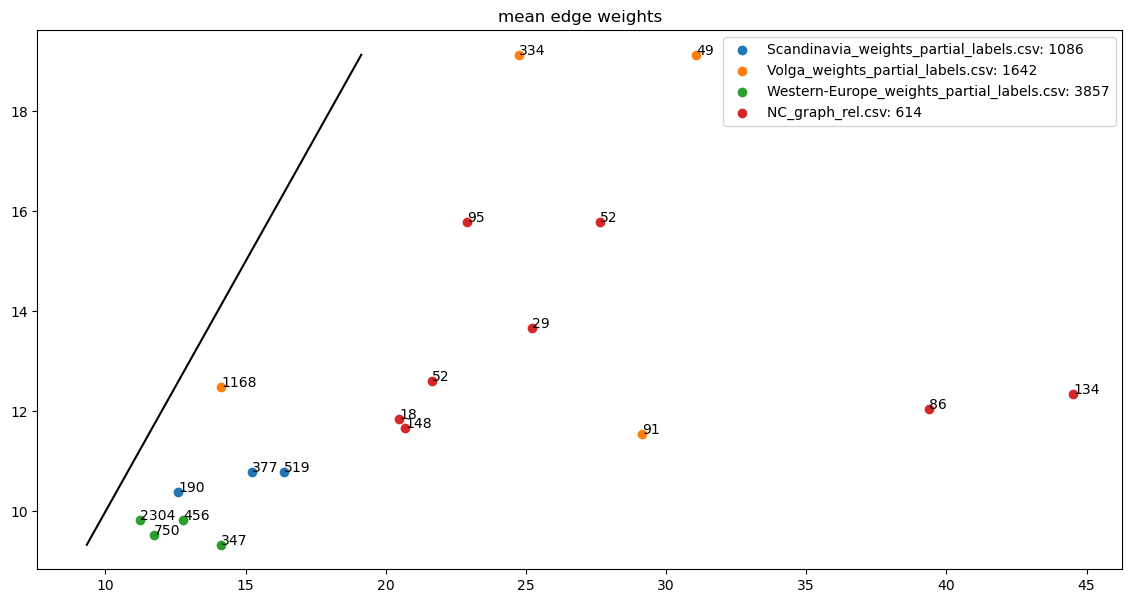

In [39]:
#print(params)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,7)
xmin = 100000
xmax=0

for dataset in params:
    mean_int = [] #population's mean existing internal edge weight
    mean_ext = [] #population's maximum among external mean existing edge weights
    mean_weight = np.array(params[dataset]["mean_weight"])
    npop = mean_weight.shape[0]
    for idx in range(npop):
        mean_int.append(mean_weight[idx,idx])
        mean_weight[idx,idx] = 0
        
        
    for idx in range(npop):
        mmext = np.max(mean_weight[idx,:])
        mean_ext.append(mmext)
        if xmin>mmext:
            xmin = mmext
        if xmax<mmext:
            xmax = mmext   
    pop_sizes = params[dataset]["pop_sizes"]
    popsize = np.sum(np.array(pop_sizes))
    plt.scatter(mean_int, mean_ext, label=dataset+': '+str(popsize))
    for i, txt in enumerate(pop_sizes):
        plt.annotate(txt, (mean_int[i], mean_ext[i]))

plt.plot([xmin,xmax], [xmin,xmax], 'k')
plt.title("mean edge weights")
plt.legend()


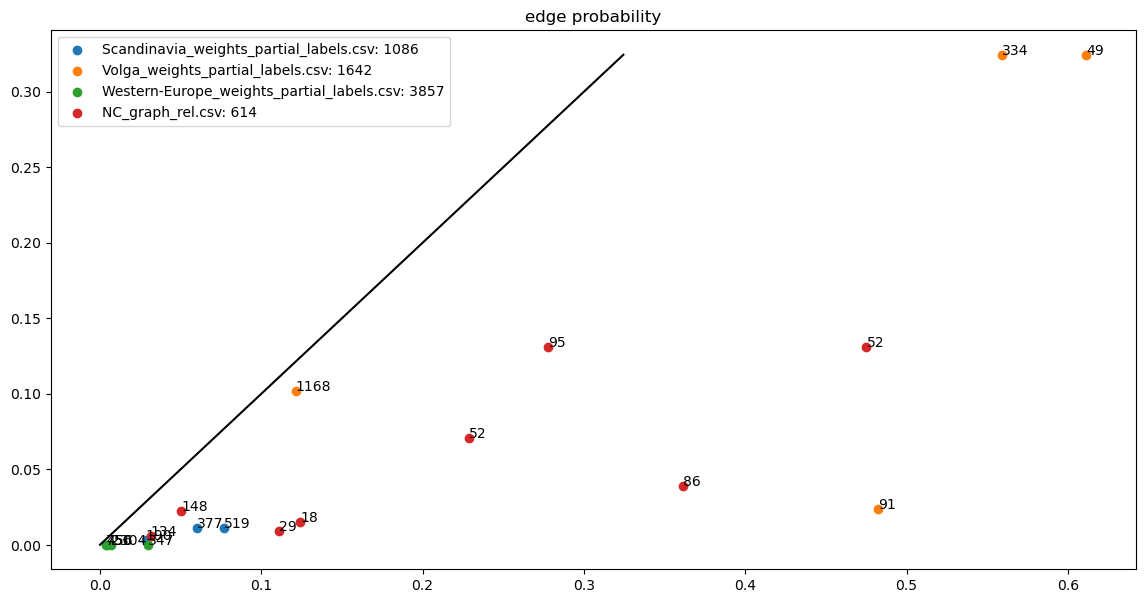

In [35]:
#print(params)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,7)
xmin = 100000
xmax=0

for dataset in params:
    mean_int = [] #population's mean existing internal edge weight
    mean_ext = [] #population's maximum among external mean existing edge weights
    mean_weight = np.array(params[dataset]["edge_probability"])
    npop = mean_weight.shape[0]
    
    for idx in range(npop):
        mean_int.append(mean_weight[idx,idx])
        mean_weight[idx,idx] = 0
        
    for idx in range(npop):
        mmext = np.max(mean_weight[idx,:])
        mean_ext.append(mmext)
        if xmin>mmext:
            xmin = mmext
        if xmax<mmext:
            xmax = mmext   
    pop_sizes = params[dataset]["pop_sizes"]
    popsize = np.sum(np.array(pop_sizes))
    plt.scatter(mean_int, mean_ext, label=dataset+': '+str(popsize))
    for i, txt in enumerate(pop_sizes):
        plt.annotate(txt, (mean_int[i], mean_ext[i]))

plt.plot([xmin,xmax], [xmin,xmax], 'k')
plt.title("edge probability")
plt.legend()

# Scandinavia

In [3]:

current_dataset = 'Scandinavia_weights_partial_labels.csv'
with open(os.path.join(folder, "meta.json")) as f:
    metadict = json.load(f)
load_args = metadict[current_dataset]
original_res = heurrun(rng, os.path.join(folder, current_dataset), valshare, testshare, itercount, debug=False, filter_params=load_args)
print(original_res)

bad partition on iter 0
bad partition on iter 1
bad partition on iter 2
bad partition on iter 3
bad partition on iter 4
bad partition on iter 6
bad partition on iter 7
bad partition on iter 8
{'IbdSumPerEdge': {'mean': 0.8619830779894802, 'std': 0.02459207093324024}, 'IbdSum': {'mean': 0.9523135302034165, 'std': 0.011395440951821992}, 'LongestIbd': {'mean': 0.9293252419685413, 'std': 0.015837174110659203}, 'SegmentCountWMult': {'mean': 0.933962531550474, 'std': 0.013899135072260163}, 'SegmentCountPerClassize': {'mean': 0.9817872406892658, 'std': 0.0072862876434416236}, 'SegmentCount': {'mean': 0.9271750453593703, 'std': 0.013383973613749194}}


In [4]:
scandparams = params[current_dataset]
print(scandparams)

{'pop_names': ['Norwegians', 'Swedes', 'Danes'], 'pop_sizes': [519, 377, 190], 'edge_probability': [[0.07716800202349336, 0.011049610810424045, 0.0031132745157691918], [0.011049610810424045, 0.060471809921553134, 0.00131229931592908], [0.0031132745157691918, 0.00131229931592908, 0.028460038986354776]], 'mean_weight': [[16.359806075388025, 10.790922252543941, 10.38897013029316], [10.790922252543941, 15.21641472468502, 9.905714680851064], [10.388970130293162, 9.905714680851064, 12.605865479452056]]}


In [10]:
def scalepopulations(baseparams, factor):
    newparams={}
    newparams['pop_names'] = baseparams['pop_names']
    newparams['edge_probability'] = baseparams['edge_probability']
    newparams['mean_weight'] = baseparams['mean_weight']
    pop_sizes = baseparams['pop_sizes']
    newparams['pop_sizes'] = [round(size*factor) for size in pop_sizes]
    return newparams

fnamebase = "/home/dglyzin/identityByDescent/datasets-tmp/Scandinavia"


start = time.time()
factors = [0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3]


for idx, factor in enumerate(factors):
    print(f"=====Generation {idx} for factor {factor}====")
    fname = fnamebase+"_gen"+str(idx)+".csv"
    params = scalepopulations(scandparams, factor)
    print("population sizes:", params["pop_sizes"])
    simulateandsaveoneparam(params, offset, fname, rng)
    finish = time.time()
    print(f"finished in {finish-start}")
    start = finish

total_pops = []
results = []




=====Generation 0 for factor 0.5====
population sizes: [260, 188, 95]
finished in 0.0682373046875
=====Generation 1 for factor 0.6====
population sizes: [311, 226, 114]
finished in 0.08629536628723145
=====Generation 2 for factor 0.7====
population sizes: [363, 264, 133]
finished in 0.13350749015808105
=====Generation 3 for factor 0.8====
population sizes: [415, 302, 152]
finished in 0.17644429206848145
=====Generation 4 for factor 0.9====
population sizes: [467, 339, 171]
finished in 0.242767333984375
=====Generation 5 for factor 1====
population sizes: [519, 377, 190]
finished in 0.3035769462585449
=====Generation 6 for factor 1.1====
population sizes: [571, 415, 209]
finished in 0.3389132022857666
=====Generation 7 for factor 1.2====
population sizes: [623, 452, 228]
finished in 0.31159257888793945
=====Generation 8 for factor 1.3====
population sizes: [675, 490, 247]
finished in 0.3774232864379883
=====Generation 9 for factor 1.4====
population sizes: [727, 528, 266]
finished in 0.

'\ntotal_pops = []\nresults = []\n\n\nstart = time.time()\nfor idx, factor in enumerate(factors):    \n    fname = fnamebase+"_gen"+str(idx)+".csv"\n    res = heurrun(rng, fname, valshare, testshare, itercount, debug=False)\n    print(res)\n    total_pops.append(np.sum(np.array(params["pop_sizes"])))\n    results.append(res)\n    \n    finish = time.time()\n    print(f"finished in {finish-start}")\n    start = finish\n'

In [11]:
start = time.time()
for idx, factor in enumerate(factors):    
    print(f"=====Heuristics for exp {idx} for factor {factor}====")
    fname = fnamebase+"_gen"+str(idx)+".csv"
    res = heurrun(rng, fname, valshare, testshare, itercount, debug=False)
    print(res)
    total_pops.append(np.sum(np.array(params["pop_sizes"])))
    results.append(res)
    
    finish = time.time()
    print(f"finished in {finish-start}")
    start = finish

=====Heuristics for exp 0 for factor 0.5====
bad partition on iter 0
bad partition on iter 2
bad partition on iter 3
bad partition on iter 6
bad partition on iter 9
{'IbdSumPerEdge': {'mean': 0.8858309539998608, 'std': 0.026192172024846597}, 'IbdSum': {'mean': 0.9419172554229904, 'std': 0.021603770469167224}, 'LongestIbd': {'mean': 0.9388087099206215, 'std': 0.016934307756352428}, 'SegmentCountWMult': {'mean': 0.9211746581595387, 'std': 0.018539928384064208}, 'SegmentCountPerClassize': {'mean': 0.9764011292253019, 'std': 0.009818052958991342}, 'SegmentCount': {'mean': 0.9211746581595387, 'std': 0.018539928384064208}}
finished in 1.096123218536377
=====Heuristics for exp 1 for factor 0.6====
bad partition on iter 0
bad partition on iter 1
bad partition on iter 2
bad partition on iter 3
bad partition on iter 4
bad partition on iter 5
bad partition on iter 6
bad partition on iter 7
bad partition on iter 8
bad partition on iter 9
{'IbdSumPerEdge': {'mean': 0.9199156706892568, 'std': 0.0294

In [9]:
total_pops

[543, 651, 760, 869, 977, 1086, 1195, 1303, 1412, 1521, 1629, 1900, 2172, 3258]

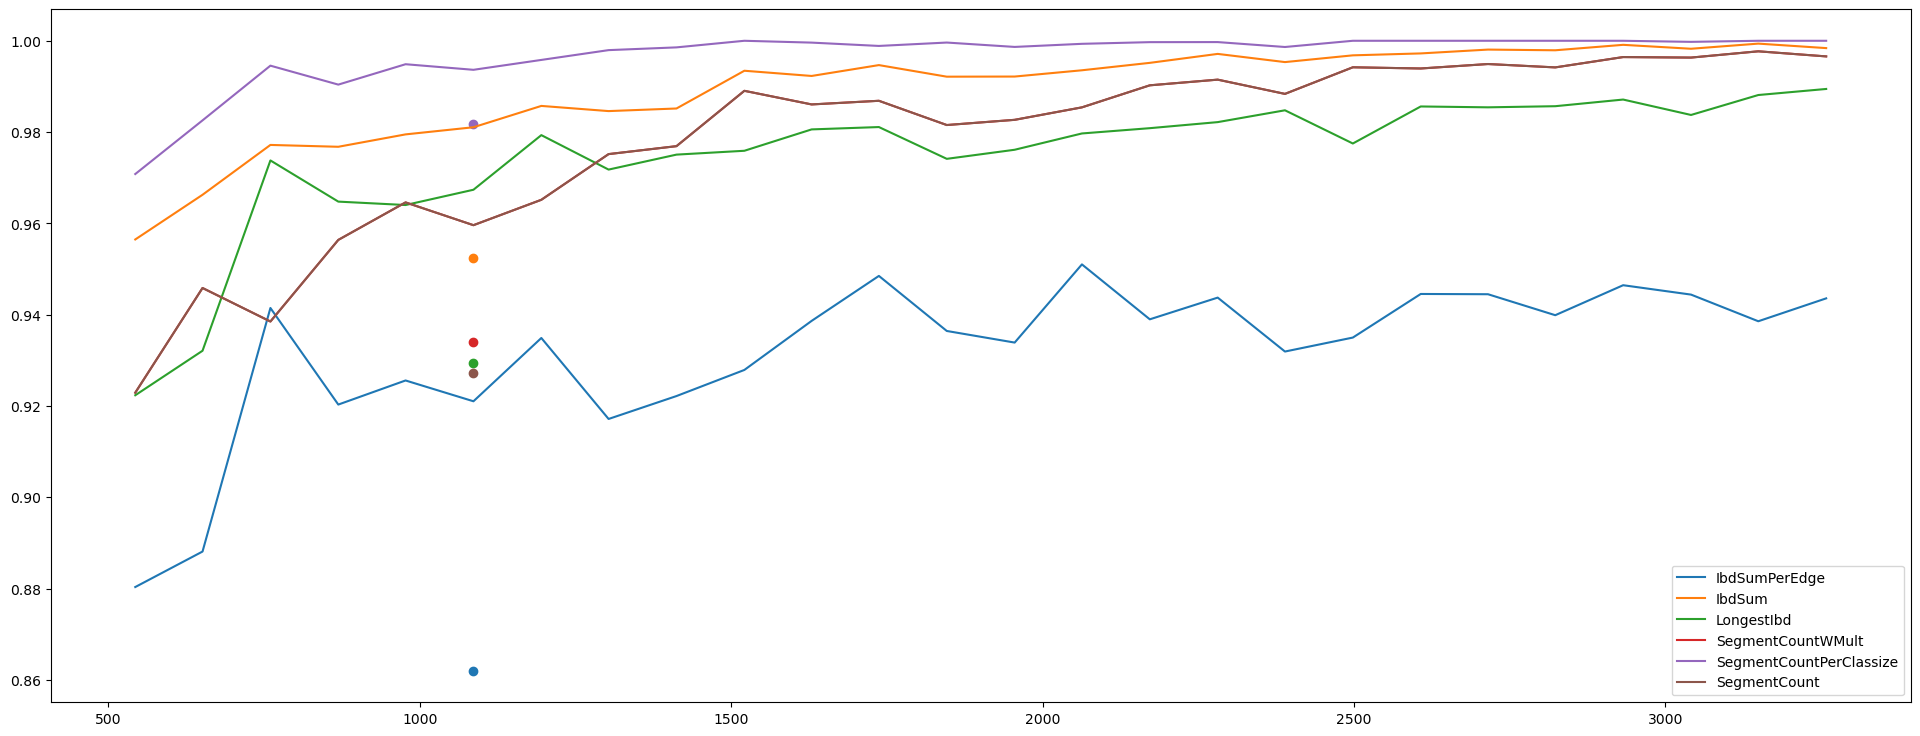

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,9)
for heur in original_res:
    perf = [res[heur]['mean'] for res in results ]
    plt.plot(total_pops, perf, label=heur)
    plt.scatter([1086], original_res[heur]['mean'])
plt.legend()

In [14]:
#new pipeline
#assume we already generated data
workdir = '/home/dglyzin/identityByDescent/datasets-pure-sim/'
explistfname = os.path.join(workdir, 'experimentlist.json')

with open(explistfname, 'r') as f:
    explist = json.load(f)

allresults = {}
for dataset in explist:
    print(dataset)
    plotX = []
    results = []
    #print()
    for exp in explist[dataset]:
        plotX.append(exp["experiment"]["intra_edge_probability_scale"])
        print(exp['partitionfile'], exp['datafile'])
        with open(exp['partitionfile'], 'r') as f:
            partitions = json.load(f)
        res = heurrun(rng,  exp['datafile'], valshare, testshare, itercount, partitions=partitions['partitions'], debug=False)
        print(res)
        results.append(res)
    allresults[dataset]={"X":plotX, "results":results}    
    break

SC
/home/dglyzin/identityByDescent/datasets-pure-sim/simSC0.part /home/dglyzin/identityByDescent/datasets-pure-sim/simSC0.csv
bad partition on iter 0
Dangling train node from population D: 969, original id:969
Dangling val node from population D: 1057, original id:1057
Dangling val node from population D: 947, original id:947
bad partition on iter 1
Dangling train node from population D: 969, original id:969
Dangling val node from population D: 1033, original id:1033
Dangling test node from population D: 1082, original id:1082
bad partition on iter 2
Dangling test node from population D: 1024, original id:1024
bad partition on iter 4
Dangling train node from population D: 1057, original id:1057
Dangling test node from population D: 1024, original id:1024
bad partition on iter 5
Dangling train node from population D: 1057, original id:1057
Dangling train node from population D: 1033, original id:1033
Dangling val node from population D: 1009, original id:1009
Dangling test node from pop

In [9]:
print(allresults)

{'SC': {'X': [0.5, 1, 1.5], 'results': [{'IbdSumPerEdge': {'mean': 0.8833716711695201, 'std': 0.018008761951388928}, 'IbdSum': {'mean': 0.9083122508366464, 'std': 0.024266466613864186}, 'LongestIbd': {'mean': 0.9085433098489076, 'std': 0.02251241942234967}, 'SegmentCountWMult': {'mean': 0.8330358979332024, 'std': 0.033948578228293044}, 'SegmentCountPerClassize': {'mean': 0.9450817971989685, 'std': 0.017099733310408996}, 'SegmentCount': {'mean': 0.8330358979332024, 'std': 0.033948578228293044}}, {'IbdSumPerEdge': {'mean': 0.9222347139342986, 'std': 0.01642869058498283}, 'IbdSum': {'mean': 0.9787746793646452, 'std': 0.011400011200989841}, 'LongestIbd': {'mean': 0.9683217669657953, 'std': 0.013892174058298127}, 'SegmentCountWMult': {'mean': 0.9651609549600755, 'std': 0.01470645299956876}, 'SegmentCountPerClassize': {'mean': 0.9962298496728611, 'std': 0.005089906045811556}, 'SegmentCount': {'mean': 0.9651609549600755, 'std': 0.01470645299956876}}, {'IbdSumPerEdge': {'mean': 0.9505955220912

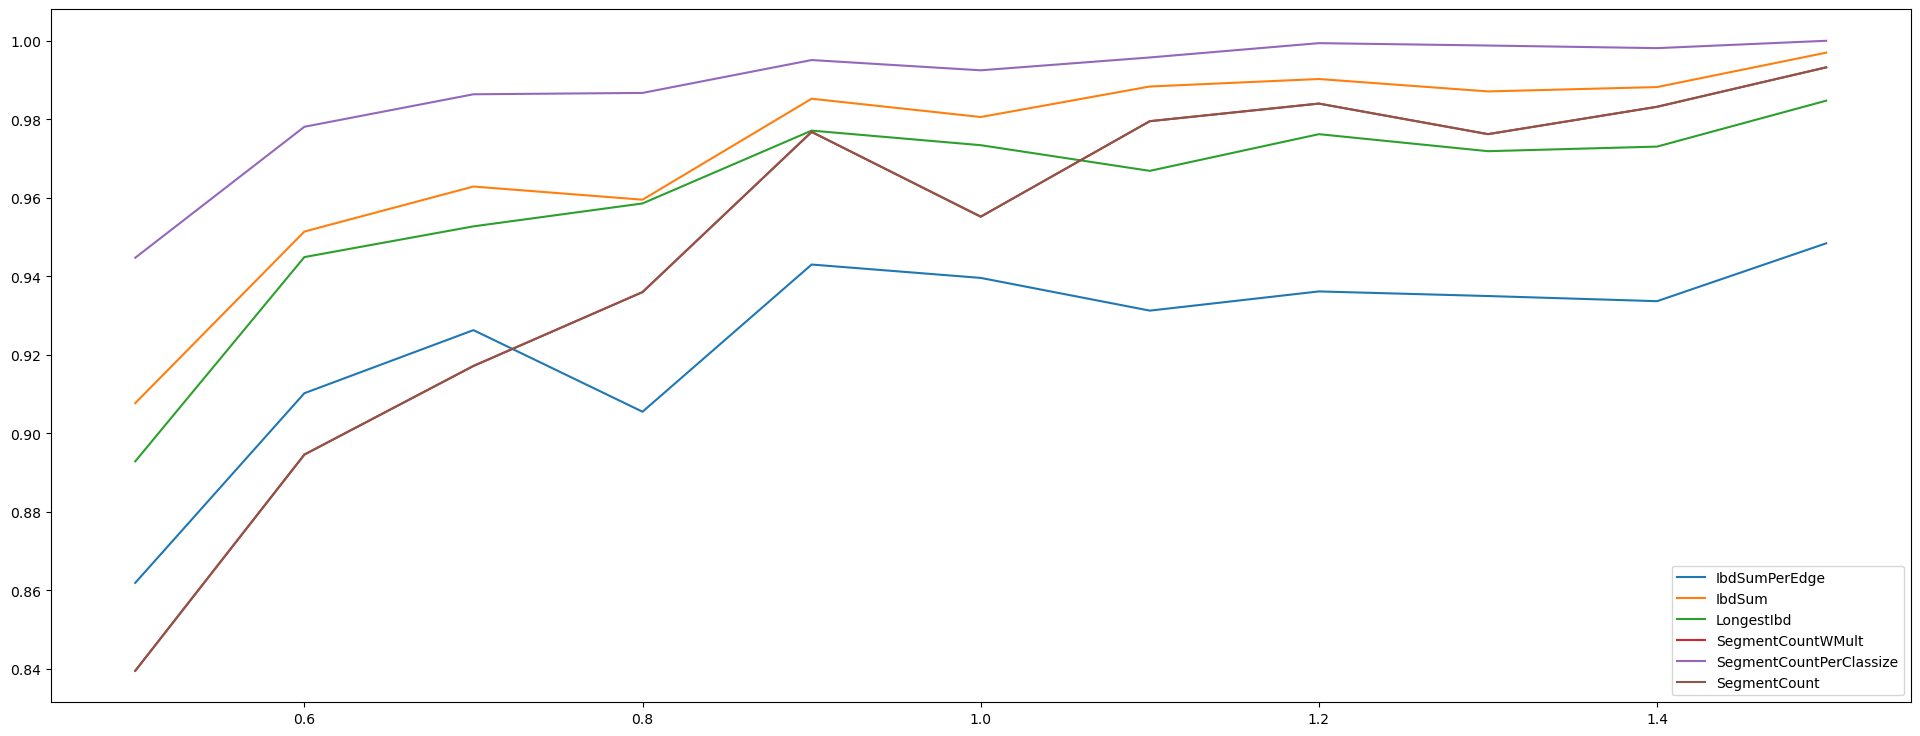

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,9)

x = allresults['SC']["X"]
original_res = allresults['SC']["results"] 

#print(original_res)
for heur in original_res[0]:
    perf = [res[heur]['mean'] for res in original_res ]
    plt.plot(x, perf, label=heur)
    
plt.legend()